## Testing environment

Little environment used to test how to train a NN on learning a correction over two different sine waves with a dampening factor

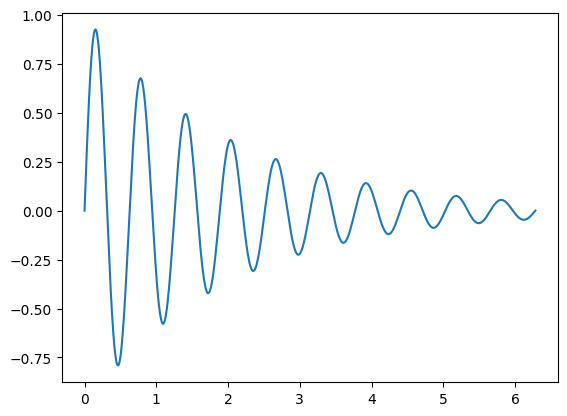

In [8]:
# Little function to create a sine wave where the parameters are the frequency and the damping factor

import numpy as np
import matplotlib.pyplot as plt

def sine_wave(frequency, damping_factor):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(frequency * x) * np.exp(-damping_factor * x)
    plt.plot(x, y)
    plt.show()

sine_wave(10, 0.5)

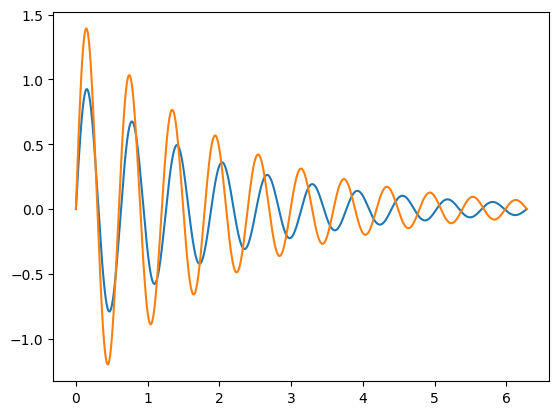

In [14]:
# same function but with also the amplitude as a parameter
def sine_wave(x, frequency, damping_factor, amplitude):
    y = amplitude * np.sin(frequency * x) * np.exp(-damping_factor * x)
    return y

x = np.linspace(0, 2*np.pi, 1000)
frequency = 10
damping_factor = 0.5
amplitude = 1

y1 = sine_wave(x, frequency, damping_factor, amplitude)
y2 = sine_wave(x, frequency + 0.5, damping_factor, 0.5+ amplitude)
 
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


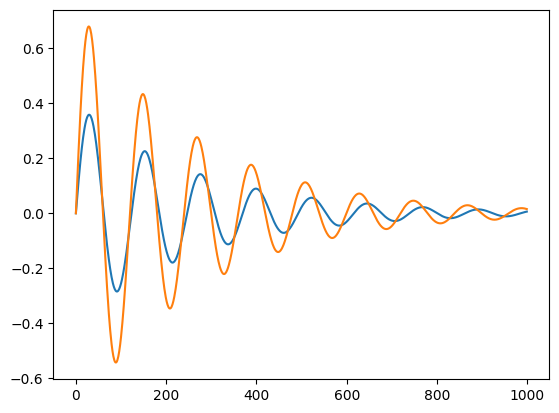

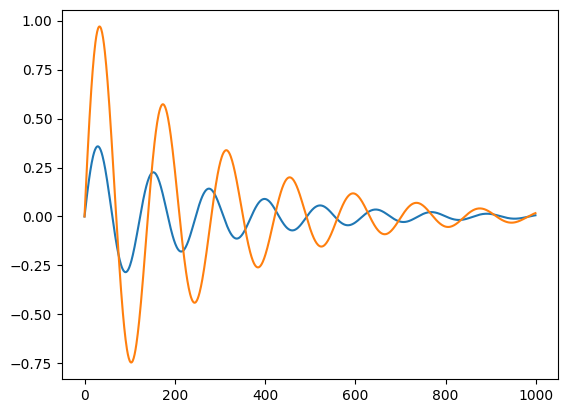

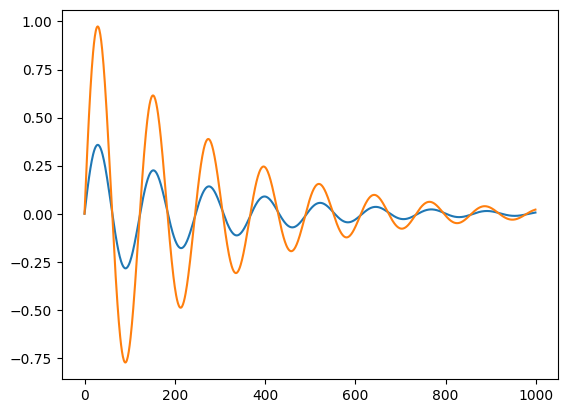

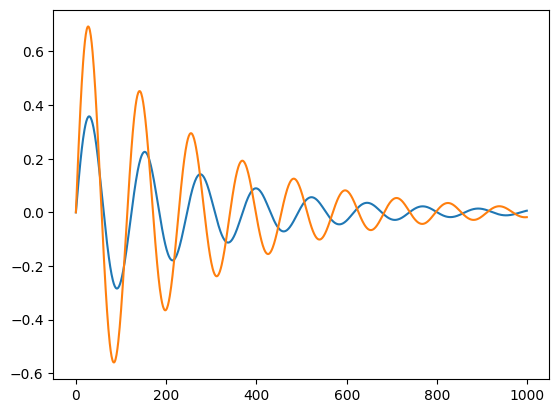

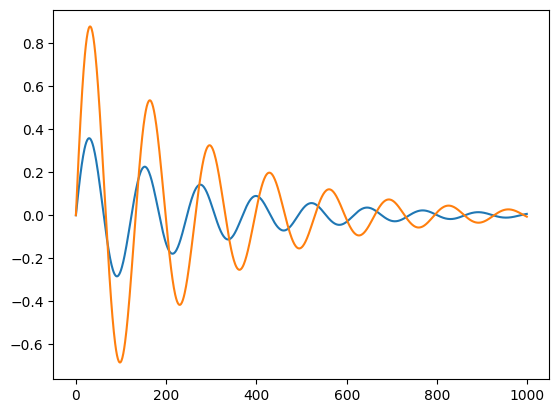

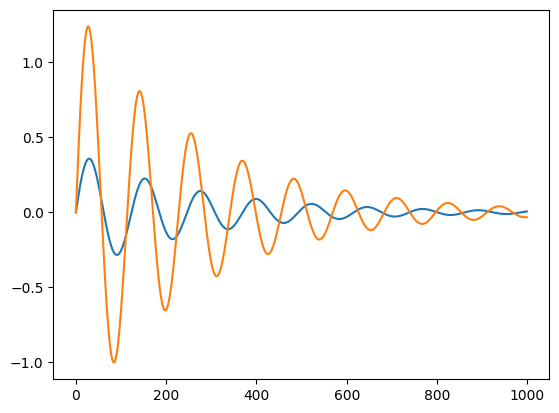

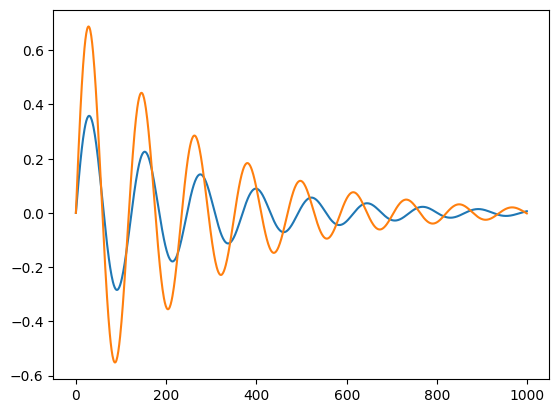

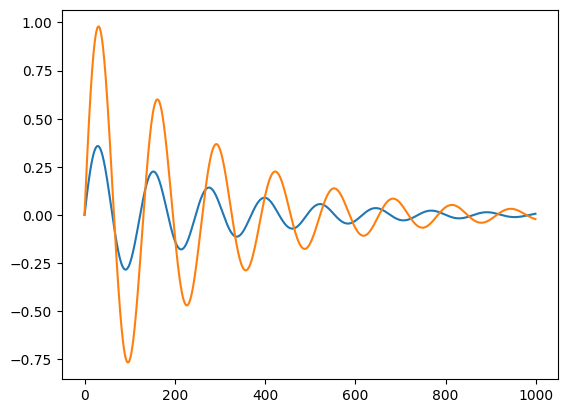

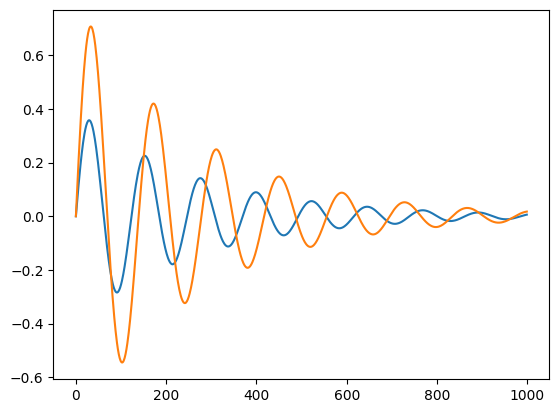

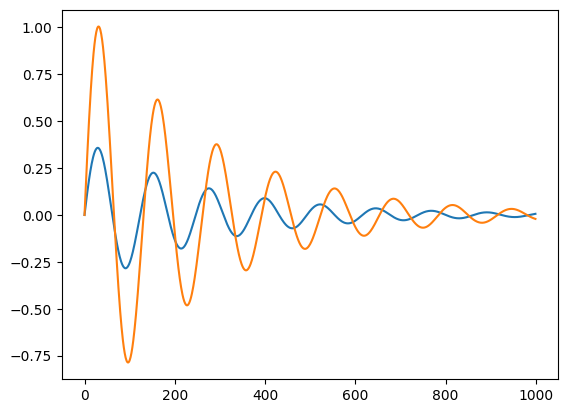

In [18]:
# now we create a function that creates a dataset of pair of sine waves {y1, y2} where y1 is the sine wave with frequency f and amplitude a and y2 is the sine wave with frequency f + df and amplitude a + da

def create_dataset(nb_samples, nb_points):
    frequency = np.random.uniform(5, 10)
    damping_factor = np.random.uniform(0, 1)
    amplitude = np.random.uniform(0, 0.5)
    x = np.linspace(0, 2*np.pi, nb_points)
    dataset = []
    for i in range(nb_samples):
        df = np.random.uniform(-1, 1)
        da = np.random.uniform(0.3, 1)
        y1 = sine_wave(x, frequency, damping_factor, amplitude)
        y2 = sine_wave(x, frequency + df, damping_factor, amplitude + da)
        dataset.append((y1, y2))
    return dataset


dataset = create_dataset(10, 1000)

for y1, y2 in dataset:
    plt.plot(y1)
    plt.plot(y2)
    plt.show()



In [ ]:
#build a Fully connected neural network to predict the difference between the two sine waves
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)